In [1]:
import torchvision
import torch
import torch.nn as nn
from torchsummary import summary

In [2]:
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.ToTensor()
])

In [5]:
PATH = "../../data/asl_alphabet_train/"

In [6]:
dataset = datasets.ImageFolder(PATH, transform=transform)

In [7]:
n = len(dataset)

In [8]:
torch.manual_seed(1)
indices = torch.randperm(n)

In [9]:
test_proportion = 0.2 # 20 percent of data used for testing
test_size = int(n * test_proportion)

In [10]:
test_dataset = torch.utils.data.Subset(dataset, indices[:test_size])

In [11]:
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=32,
                                              shuffle=False,
                                              num_workers=4)

In [3]:
model = torch.load("../../data/googlenet_asl_v2.pth")

In [17]:
incorrect_imgs = torch.Tensor().to('cuda')
incorrect_preds = torch.IntTensor().to('cuda')
incorrect_labels = torch.IntTensor().to('cuda')

with torch.no_grad():
    it = iter(test_dataloader)
    while incorrect_imgs.size(0) < 20:
        images, labels = next(it)
        images, labels = images.to('cuda'), labels.to('cuda')
        output = model(images)
        pred = output.argmax(dim=1)
        incorrects = (pred != labels).nonzero()
        if incorrects.size(0) > 0:
            idx = incorrects[0]
            incorrect_imgs = torch.cat((incorrect_imgs, images[idx]))
            incorrect_preds = torch.cat((incorrect_preds, pred[idx]))
            incorrect_labels = torch.cat((incorrect_labels, labels[idx]))    

In [20]:
classes = dataset.classes

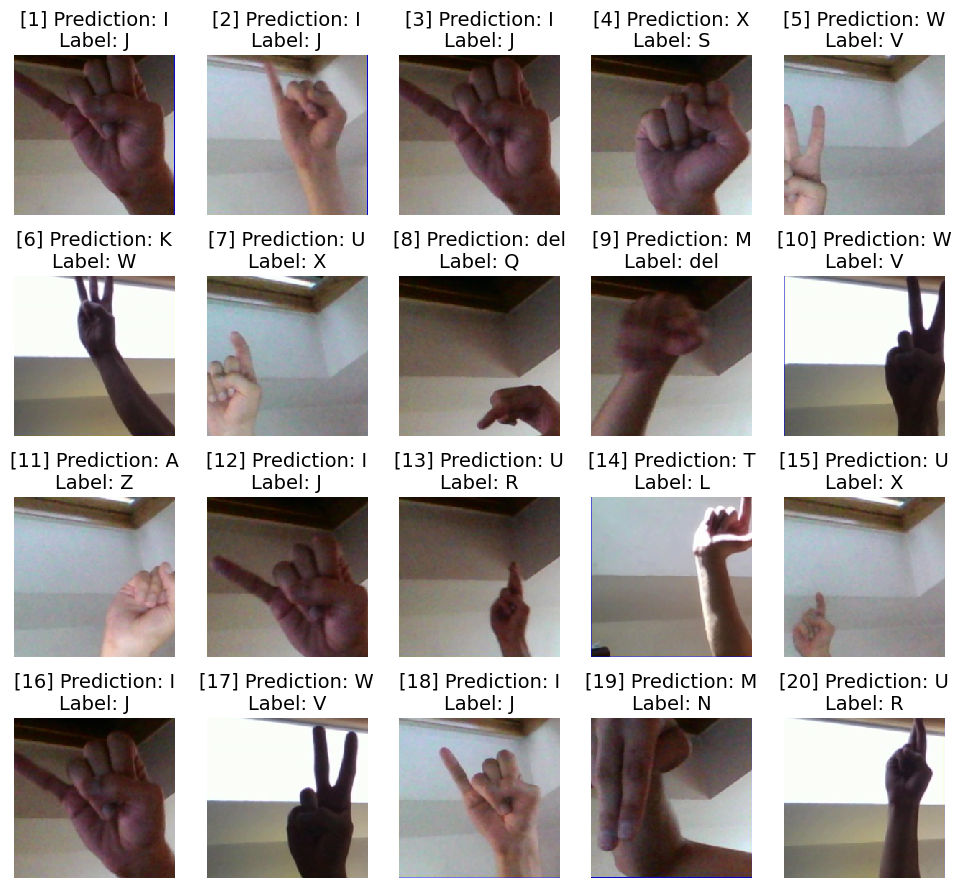

In [25]:
fig = plt.figure(figsize=(12, 11))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(incorrect_imgs[i].cpu().permute(1, 2, 0), cmap='gray', interpolation='none')
    pred = classes[incorrect_preds[i].item()]
    true = classes[incorrect_labels[i].item()]
    plt.title(f'{[i+1]} Prediction: {pred}\nLabel: {true}', 
              fontsize=14)
    plt.axis('off')
    

* Many J have been classified as I because they are pratically similar signs with J having motion. (J and Z are two alphabets that have motion). Refer: [1], [2], [3], [12], [16] and [18].

* U and R are also similar gestures with R having the two fringers crosses. So when it is not very clear to see that the fingers are crossed, they are classfied as U. Refer [13] and [20].

* Otherwise, some images are cropped and unclear. For example, [5], [6], [7], [8], [10], [11] and [14] are some cropped images and [11] is unclear.